# Vehicle Insurance Fraud Detection: Binary Classification Case

## Автор: Мартюшева Анна Васильевна aka "Армянская мафия" ИУ1 - 41Б

## Часть 1: Исследование, анализ и правка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_acc = pd.read_csv('carclaims.csv')

In [3]:
car_acc.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [4]:
car_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [5]:
car_acc.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64

<img src = 'columns_3.jpg'>

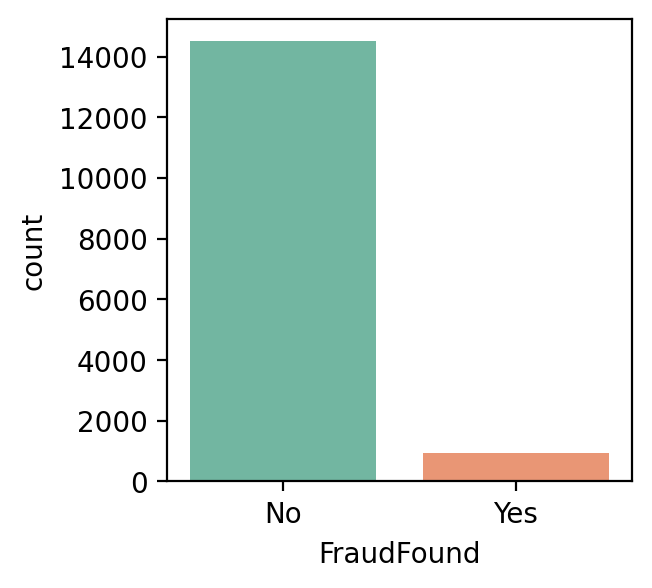

In [6]:
plt.figure(figsize = (3, 3), dpi = 200);
sns.countplot(x = 'FraudFound', data = car_acc, palette = 'Set2');

In [7]:
for i in car_acc.columns:
    print(i, '\t', car_acc[i].unique())

Month 	 ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']
WeekOfMonth 	 [5 3 2 4 1]
DayOfWeek 	 ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
Make 	 ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
AccidentArea 	 ['Urban' 'Rural']
DayOfWeekClaimed 	 ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
MonthClaimed 	 ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0']
WeekOfMonthClaimed 	 [1 4 2 3 5]
Sex 	 ['Female' 'Male']
MaritalStatus 	 ['Single' 'Married' 'Widow' 'Divorced']
Age 	 [21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55
 35 44 72 29 37 59 49 50 26 48 64 33 74 23 25 56 16 68 18 51 22 53 46 43
 57 54 69 67 19 78 77 75 80 58 73 24 76 62 79 70 17 66]
Fault 	 ['Policy Holder' 'Third Party']
PolicyType 	 ['Sport - Liability' 'Sport - Colli

In [8]:
car_acc = car_acc.drop(['PolicyNumber'], axis = 1)
car_acc['DayOfWeekClaimed'] = car_acc['DayOfWeekClaimed'].replace('0', 'Monday')
car_acc['MonthClaimed'] = car_acc['MonthClaimed'].replace('0', 'Aug')

In [9]:
def make_digit_day(day):
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    return days.index(day)

In [10]:
def make_digit_month(month):
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    return months.index(month)

In [11]:
car_acc['Month'] = car_acc['Month'].apply(make_digit_month)
car_acc['MonthClaimed'] = car_acc['MonthClaimed'].apply(make_digit_month)
car_acc['DayOfWeek'] = car_acc['DayOfWeek'].apply(make_digit_day)
car_acc['DayOfWeekClaimed'] = car_acc['DayOfWeekClaimed'].apply(make_digit_day)

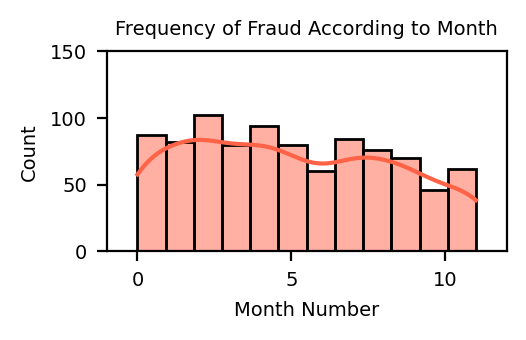

In [12]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (2, 1), dpi = 200)
axes = fig.add_axes([0, 0, 1, 1])
sns.histplot(x = 'Month', data = car_acc[car_acc['FraudFound'] == 'Yes'], bins = 12, kde = True, color = 'tomato')
axes.set_xlim(-1, 12)
axes.set_ylim(0, 150)
axes.set_ylabel(ylabel = 'Count', **{'fontsize' : 7});
axes.set_xlabel(xlabel = 'Month Number', **{'fontsize' : 7});
axes.set_xticklabels(labels = ['', '0', '5', '10'], **{'fontsize' : 7});
axes.set_yticklabels(labels = ['0', '50', '100', '150'], **{'fontsize' : 7});
axes.set_title(label = 'Frequency of Fraud According to Month', **{'fontsize' : 7});

In [13]:
def get_diff_in_months(acc, claim):
    diff_months = 0

    if acc > claim:
        diff_months = claim + (12 - acc)
    else:
        diff_months = claim - acc
    return diff_months

In [14]:
car_acc['Acc-ClaimDiffInMonths'] = car_acc[['Month', 'MonthClaimed']]\
.apply(lambda df: get_diff_in_months(df['Month'], df['MonthClaimed']), axis = 1)

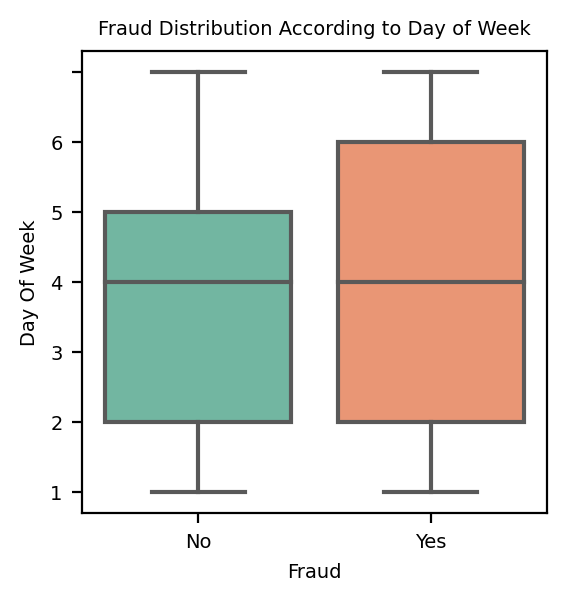

In [15]:
plt.figure(figsize = (3, 3), dpi = 200)
g = sns.boxplot(x = 'FraudFound', y = 'DayOfWeek', data = car_acc, palette = 'Set2')
g.set_title(label = 'Fraud Distribution According to Day of Week', **{'fontsize' : 7});
g.set_xticklabels(labels = ['No', 'Yes'], **{'fontsize' : 7});
g.set_yticklabels(labels = ['0', '1', '2', '3', '4', '5', '6'], **{'fontsize' : 7});
g.set_ylabel(ylabel = 'Day Of Week', **{'fontsize' : 7});
g.set_xlabel(xlabel = 'Fraud', **{'fontsize' : 7});

In [16]:
car_acc = car_acc.drop(['Month','MonthClaimed','WeekOfMonth','WeekOfMonthClaimed',
                        'DayOfWeekClaimed','AgeOfPolicyHolder'], axis = 1)

In [17]:
car_acc['FraudFound'] = car_acc['FraudFound'].replace('Yes', 1)
car_acc['FraudFound'] = car_acc['FraudFound'].replace('No', 0)
car_acc['PoliceReportFiled'] = car_acc['PoliceReportFiled'].replace('Yes', 1)
car_acc['PoliceReportFiled'] = car_acc['PoliceReportFiled'].replace('No', 0)
car_acc['WitnessPresent'] = car_acc['WitnessPresent'].replace('Yes', 1)
car_acc['WitnessPresent'] = car_acc['WitnessPresent'].replace('No', 0)
car_acc['NumberOfSuppliments'] = car_acc['NumberOfSuppliments'].replace(to_replace = 'none', value='0')
car_acc['PastNumberOfClaims'] = car_acc['PastNumberOfClaims'].replace(to_replace = 'none', value='0')

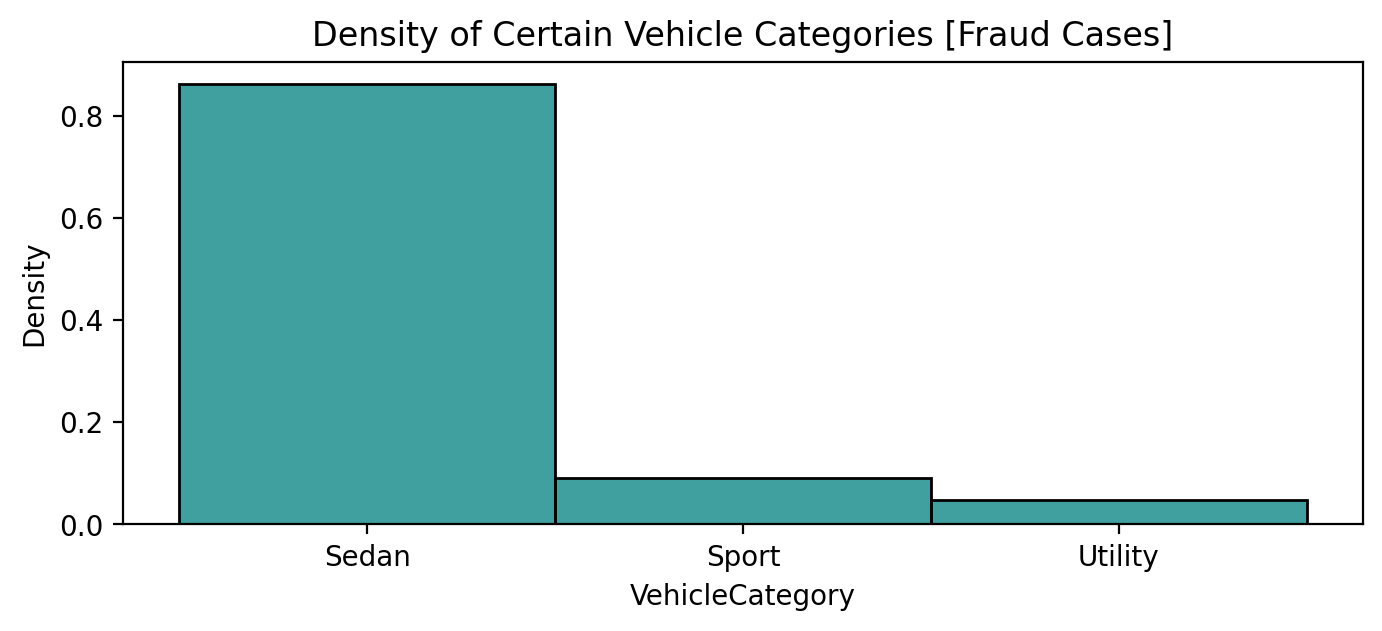

In [18]:
plt.figure(figsize = (8, 3), dpi = 200)
g = sns.histplot(x = 'VehicleCategory', data = car_acc[car_acc['FraudFound'] == 1], stat = 'density', color = 'teal')
g.set_title('Density of Certain Vehicle Categories [Fraud Cases]');

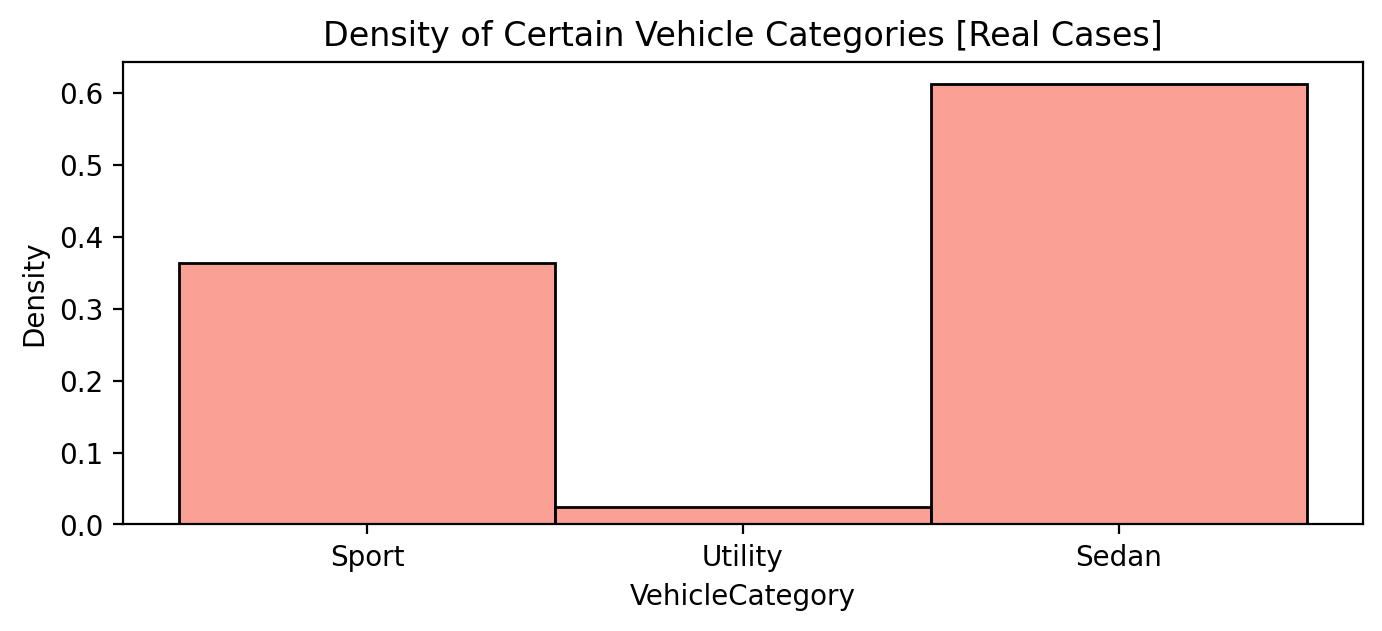

In [19]:
plt.figure(figsize = (8, 3), dpi = 200)
g = sns.histplot(x = 'VehicleCategory', data = car_acc[car_acc['FraudFound'] == 0], stat = 'density', color = 'salmon');
g.set_title('Density of Certain Vehicle Categories [Real Cases]');

<Figure size 2000x600 with 0 Axes>

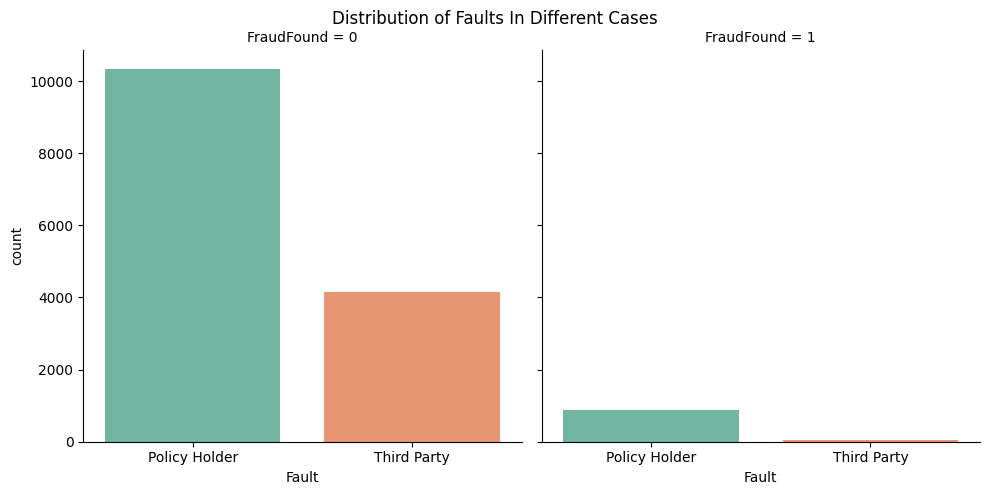

In [20]:
plt.figure(figsize = (10, 3), dpi = 200)
g = sns.catplot(x = 'Fault', data = car_acc, col = 'FraudFound', palette = 'Set2', kind = 'count');
g.fig.subplots_adjust(top = 0.9)
g.fig.suptitle('Distribution of Faults In Different Cases');

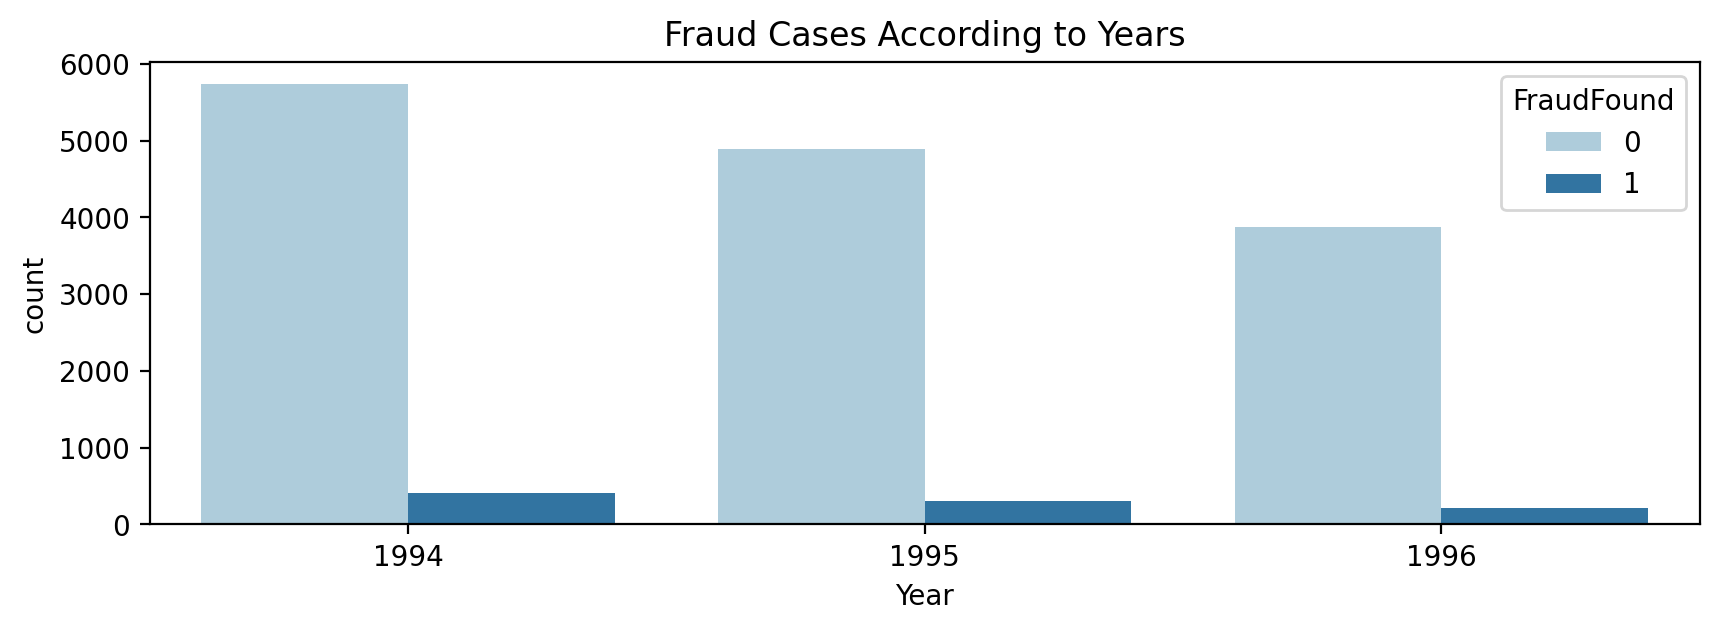

In [21]:
plt.figure(figsize = (10, 3), dpi = 200)
g = sns.countplot(x = 'Year', data = car_acc, hue = 'FraudFound', palette = 'Paired');
g.set_title('Fraud Cases According to Years');

In [22]:
car_acc.head()

,DayOfWeek,Make,AccidentArea,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,...,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound,Acc-ClaimDiffInMonths
0,2,Honda,Urban,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",...,0,0,External,0,1 year,3 to 4,1994,Liability,0,1
1,2,Honda,Urban,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",...,1,0,External,0,no change,1 vehicle,1994,Collision,0,0
2,4,Honda,Urban,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",...,0,0,External,0,no change,1 vehicle,1994,Collision,0,1
3,5,Toyota,Rural,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",...,1,0,External,more than 5,no change,1 vehicle,1994,Liability,0,1
4,0,Honda,Urban,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",...,0,0,External,0,no change,1 vehicle,1994,Collision,0,1


In [23]:
def make_int_price(price):
    if price.split()[0] != 'more':
        return int(price.split()[-1]) - 1000*np.random.randint(9)
    else:
        return int(price.split()[-1]) + 1000*np.random.randint(20)

In [24]:
car_acc['VehiclePrice'] = car_acc['VehiclePrice'].replace(to_replace = r',', value = '', regex = True)

In [25]:
car_acc['VehiclePrice'] = car_acc['VehiclePrice'].apply(make_int_price)

In [26]:
def make_car_age_int(age):
    if age.split()[0] != 'more' and age.split()[0] != 'new':
        return int(age.split()[0])
    elif age.split()[0] == 'more':
        return 8 + np.random.randint(0, 5)
    else:
        return np.random.randint(0, 2)

In [27]:
car_acc['AgeOfVehicle'] = car_acc['AgeOfVehicle'].apply(make_car_age_int)

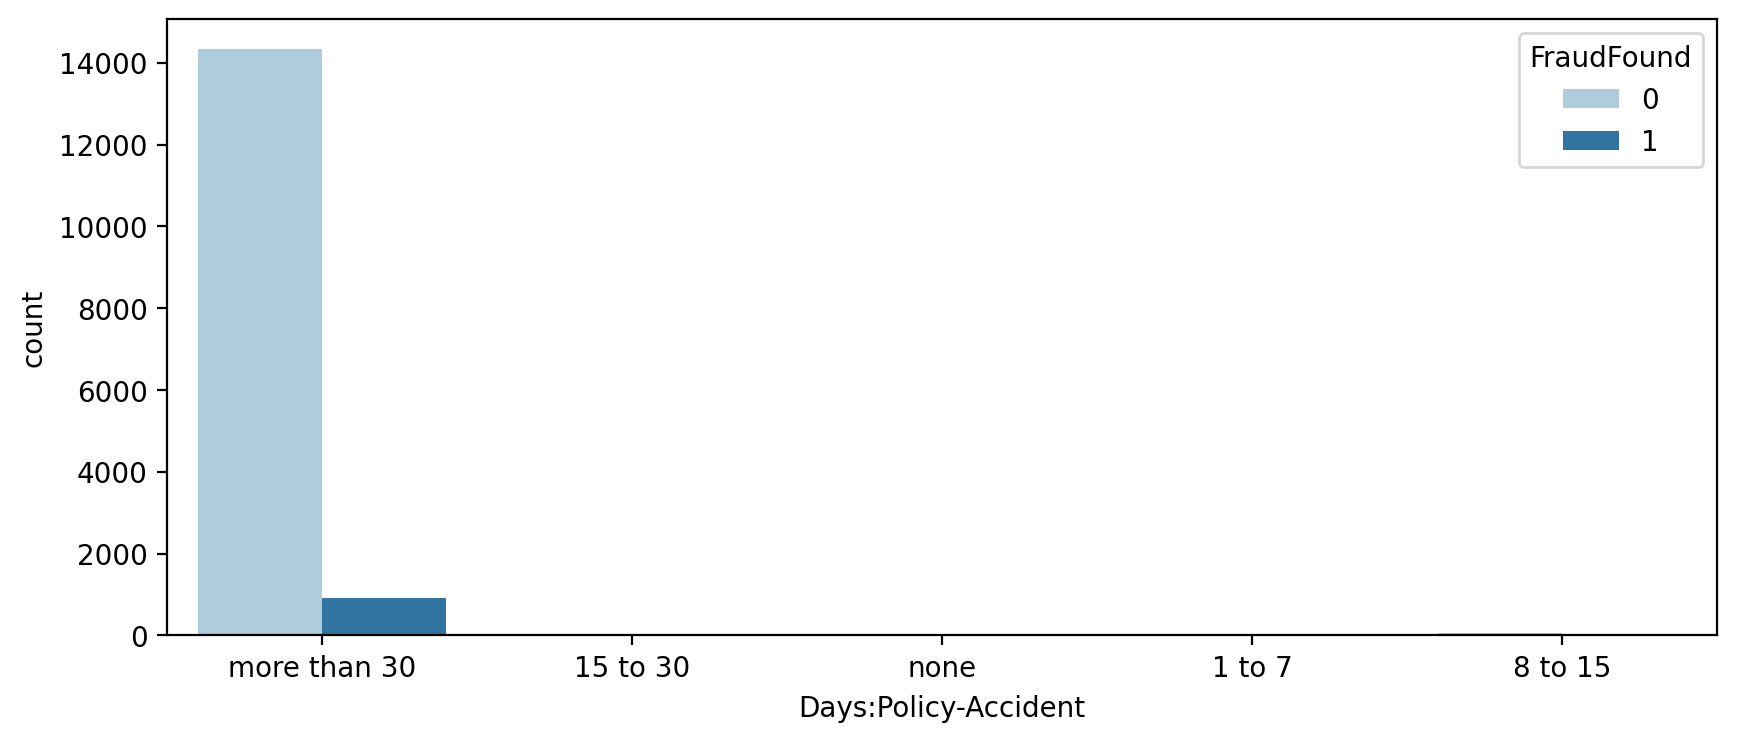

In [28]:
plt.figure(figsize = (10, 4), dpi = 200);
sns.countplot(x = 'Days:Policy-Accident', data = car_acc, hue = 'FraudFound', palette = 'Paired');

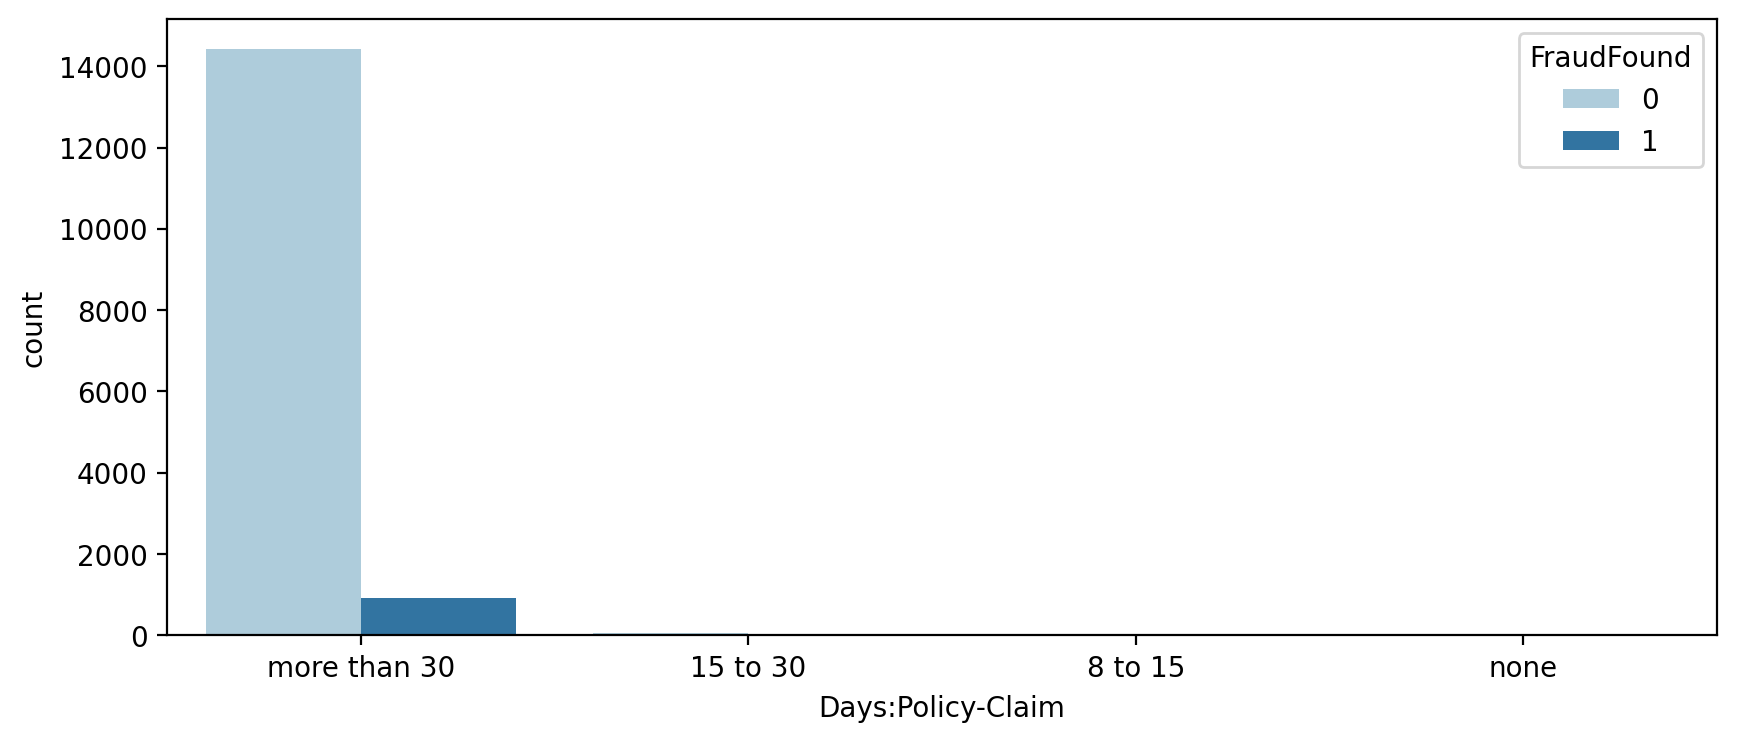

In [29]:
plt.figure(figsize = (10, 4), dpi = 200);
sns.countplot(x = 'Days:Policy-Claim', data = car_acc, hue = 'FraudFound', palette = 'Paired');

In [30]:
car_acc = car_acc.drop(['Days:Policy-Claim', 'Days:Policy-Accident'], axis = 1)

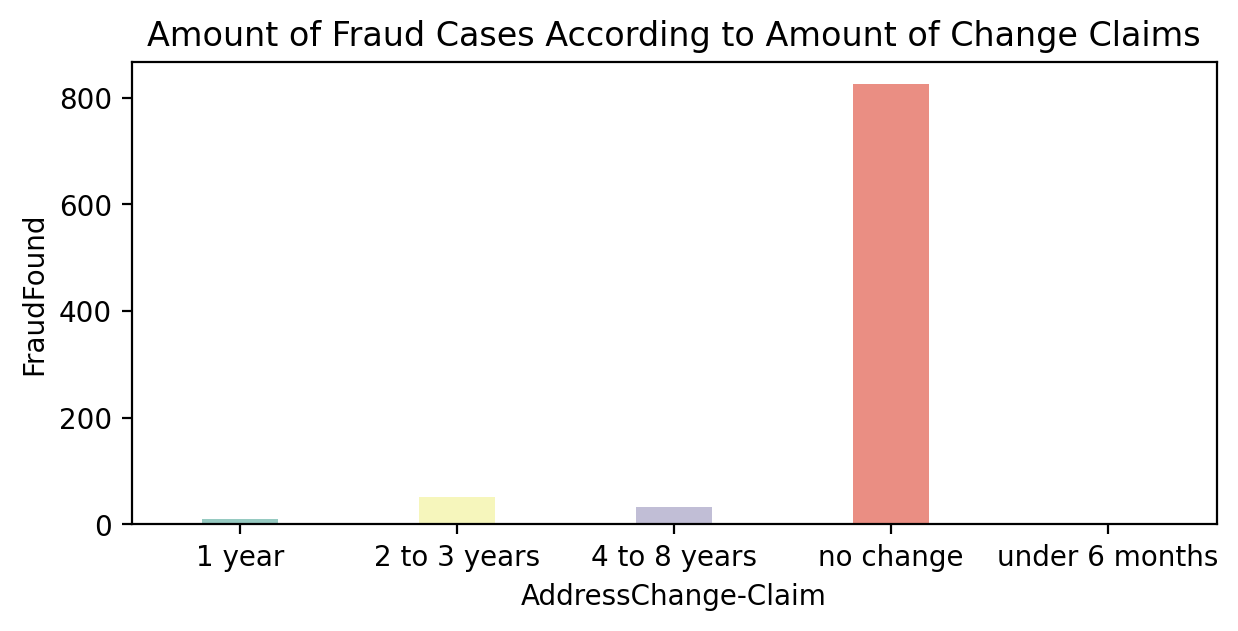

In [31]:
plt.figure(figsize = (7, 3), dpi = 200);
g = sns.barplot(x = 'AddressChange-Claim', y = 'FraudFound', 
            data = car_acc.groupby(by = ['AddressChange-Claim']).sum().reset_index(),
           palette = 'Set3', width = 0.35);
g.set_title('Amount of Fraud Cases According to Amount of Change Claims');

In [32]:
def change_address_period(period):
    if period == '1 year' or period == 'under 6 months' or period == '2 to 3 years':
        return '0 to 3 years'
    else:
        return period

In [33]:
car_acc['AddressChange-Claim'] = car_acc['AddressChange-Claim'].apply(change_address_period)

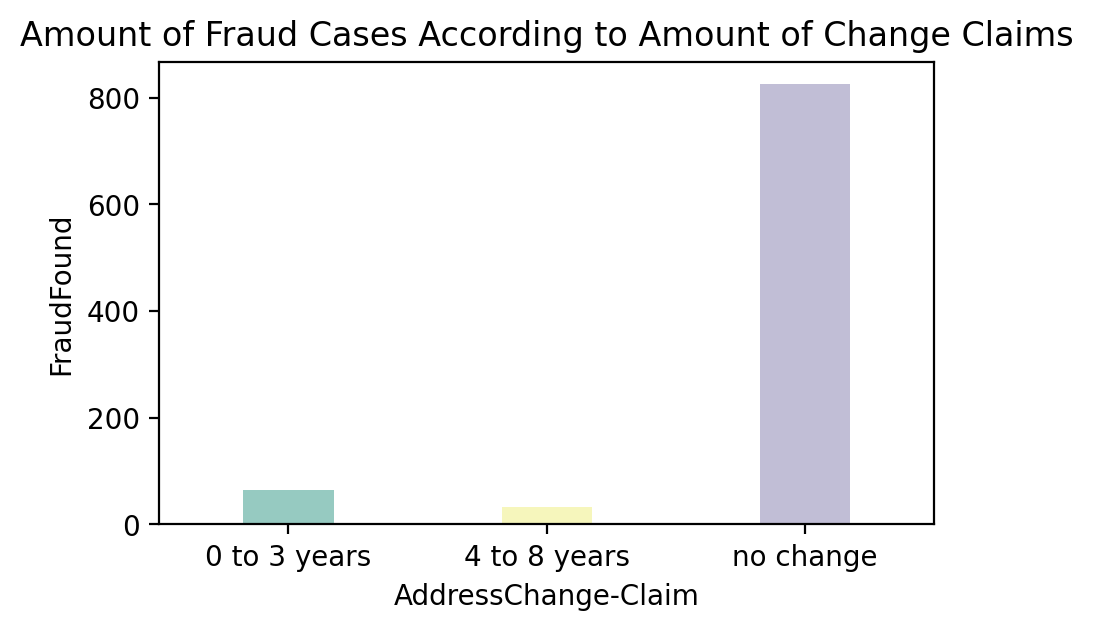

In [34]:
plt.figure(figsize = (5, 3), dpi = 200);
g = sns.barplot(x = 'AddressChange-Claim', y = 'FraudFound', 
            data = car_acc.groupby(by = ['AddressChange-Claim']).sum().reset_index(),
           palette = 'Set3', width = 0.35);
g.set_title('Amount of Fraud Cases According to Amount of Change Claims');

In [35]:
def make_car_amount_digits(amount):
    if amount.split()[0] == '5' or amount.split()[-1] == '8':
        return 'more than 5'
    elif amount.split()[0] == "1" or amount.split()[0] == "2":
        return amount.split()[0]
    else:
        return amount

In [36]:
car_acc['NumberOfCars'] = car_acc['NumberOfCars'].apply(make_car_amount_digits)

## Часть 2: Корреляционный анализ

In [37]:
car_acc_dummy = pd.get_dummies(car_acc, drop_first = True)

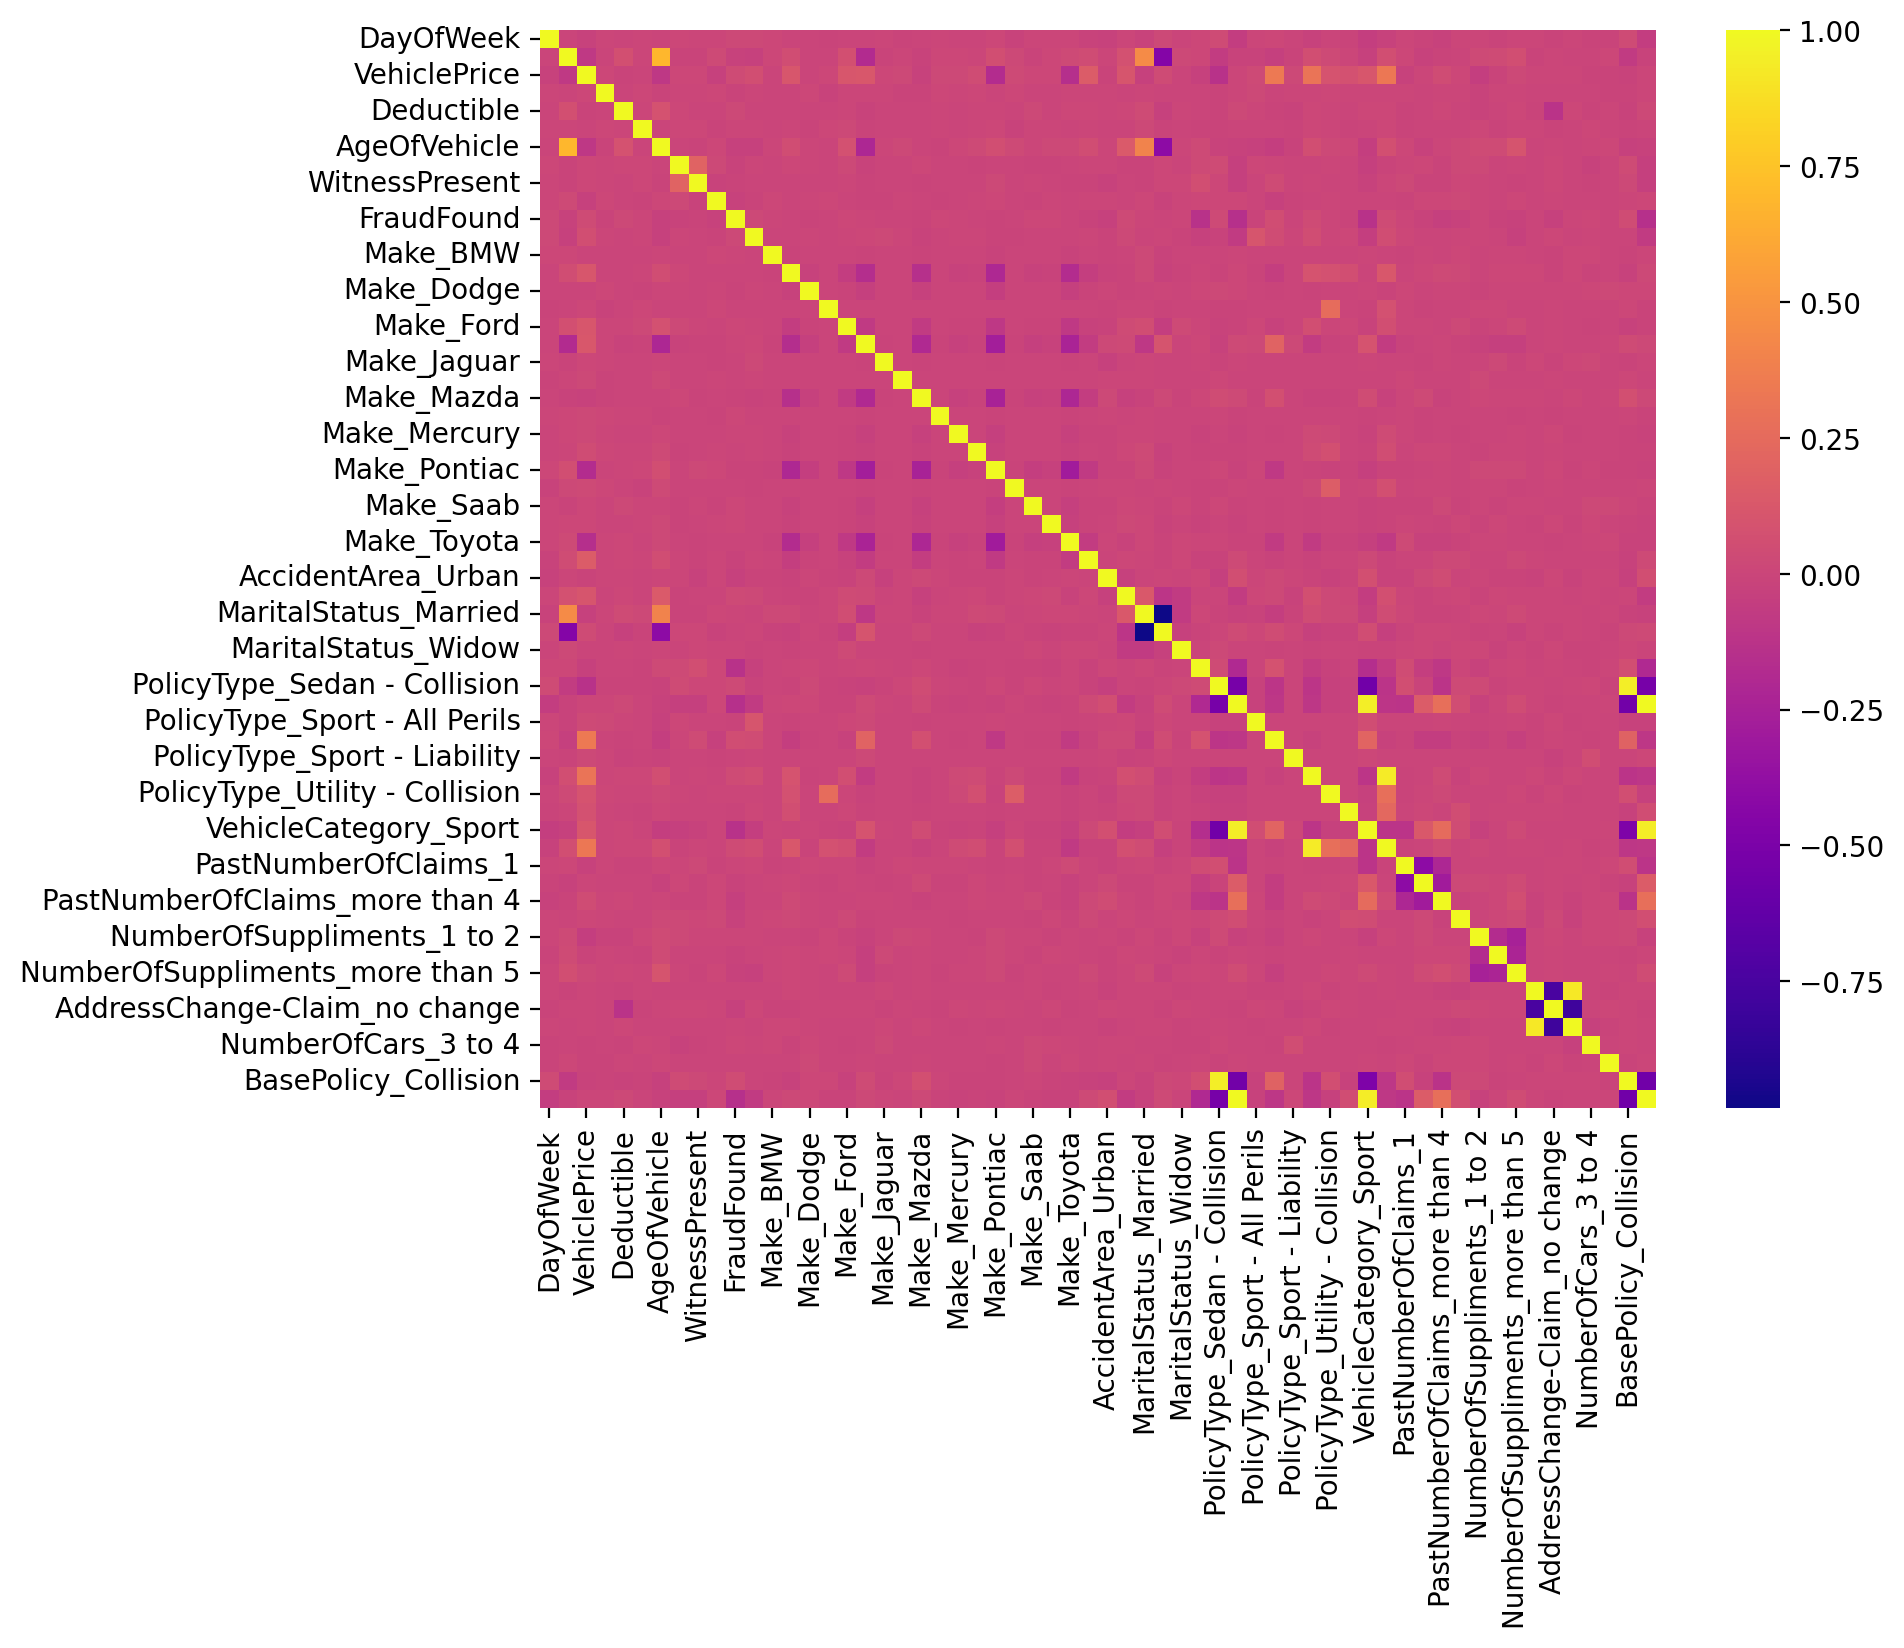

In [38]:
plt.figure(figsize = (9, 7), dpi = 200);
sns.heatmap(data = car_acc_dummy.corr(), cmap = 'plasma');

In [39]:
car_acc_corr = car_acc_dummy.corr()
for col in car_acc_corr.columns:
    for row in car_acc_corr.index:
        if abs(car_acc_corr[col][row]) > 0.7 and row != col:
            print(row + '\t\t' + col + '\t\t' +  str(round(car_acc_corr[col][row], 3)))

MaritalStatus_Single		MaritalStatus_Married		-0.983
MaritalStatus_Married		MaritalStatus_Single		-0.983
BasePolicy_Collision		PolicyType_Sedan - Collision		0.949
VehicleCategory_Sport		PolicyType_Sedan - Liability		0.947
BasePolicy_Liability		PolicyType_Sedan - Liability		0.997
VehicleCategory_Utility		PolicyType_Utility - All Perils		0.931
PolicyType_Sedan - Liability		VehicleCategory_Sport		0.947
BasePolicy_Liability		VehicleCategory_Sport		0.944
PolicyType_Utility - All Perils		VehicleCategory_Utility		0.931
AddressChange-Claim_no change		AddressChange-Claim_4 to 8 years		-0.747
NumberOfCars_2		AddressChange-Claim_4 to 8 years		0.917
AddressChange-Claim_4 to 8 years		AddressChange-Claim_no change		-0.747
NumberOfCars_2		AddressChange-Claim_no change		-0.794
AddressChange-Claim_4 to 8 years		NumberOfCars_2		0.917
AddressChange-Claim_no change		NumberOfCars_2		-0.794
PolicyType_Sedan - Collision		BasePolicy_Collision		0.949
PolicyType_Sedan - Liability		BasePolicy_Liability		0.997
Veh

In [40]:
car_acc = car_acc.drop(['PolicyType'], axis = 1)
car_acc_corr = pd.get_dummies(car_acc, drop_first = True)

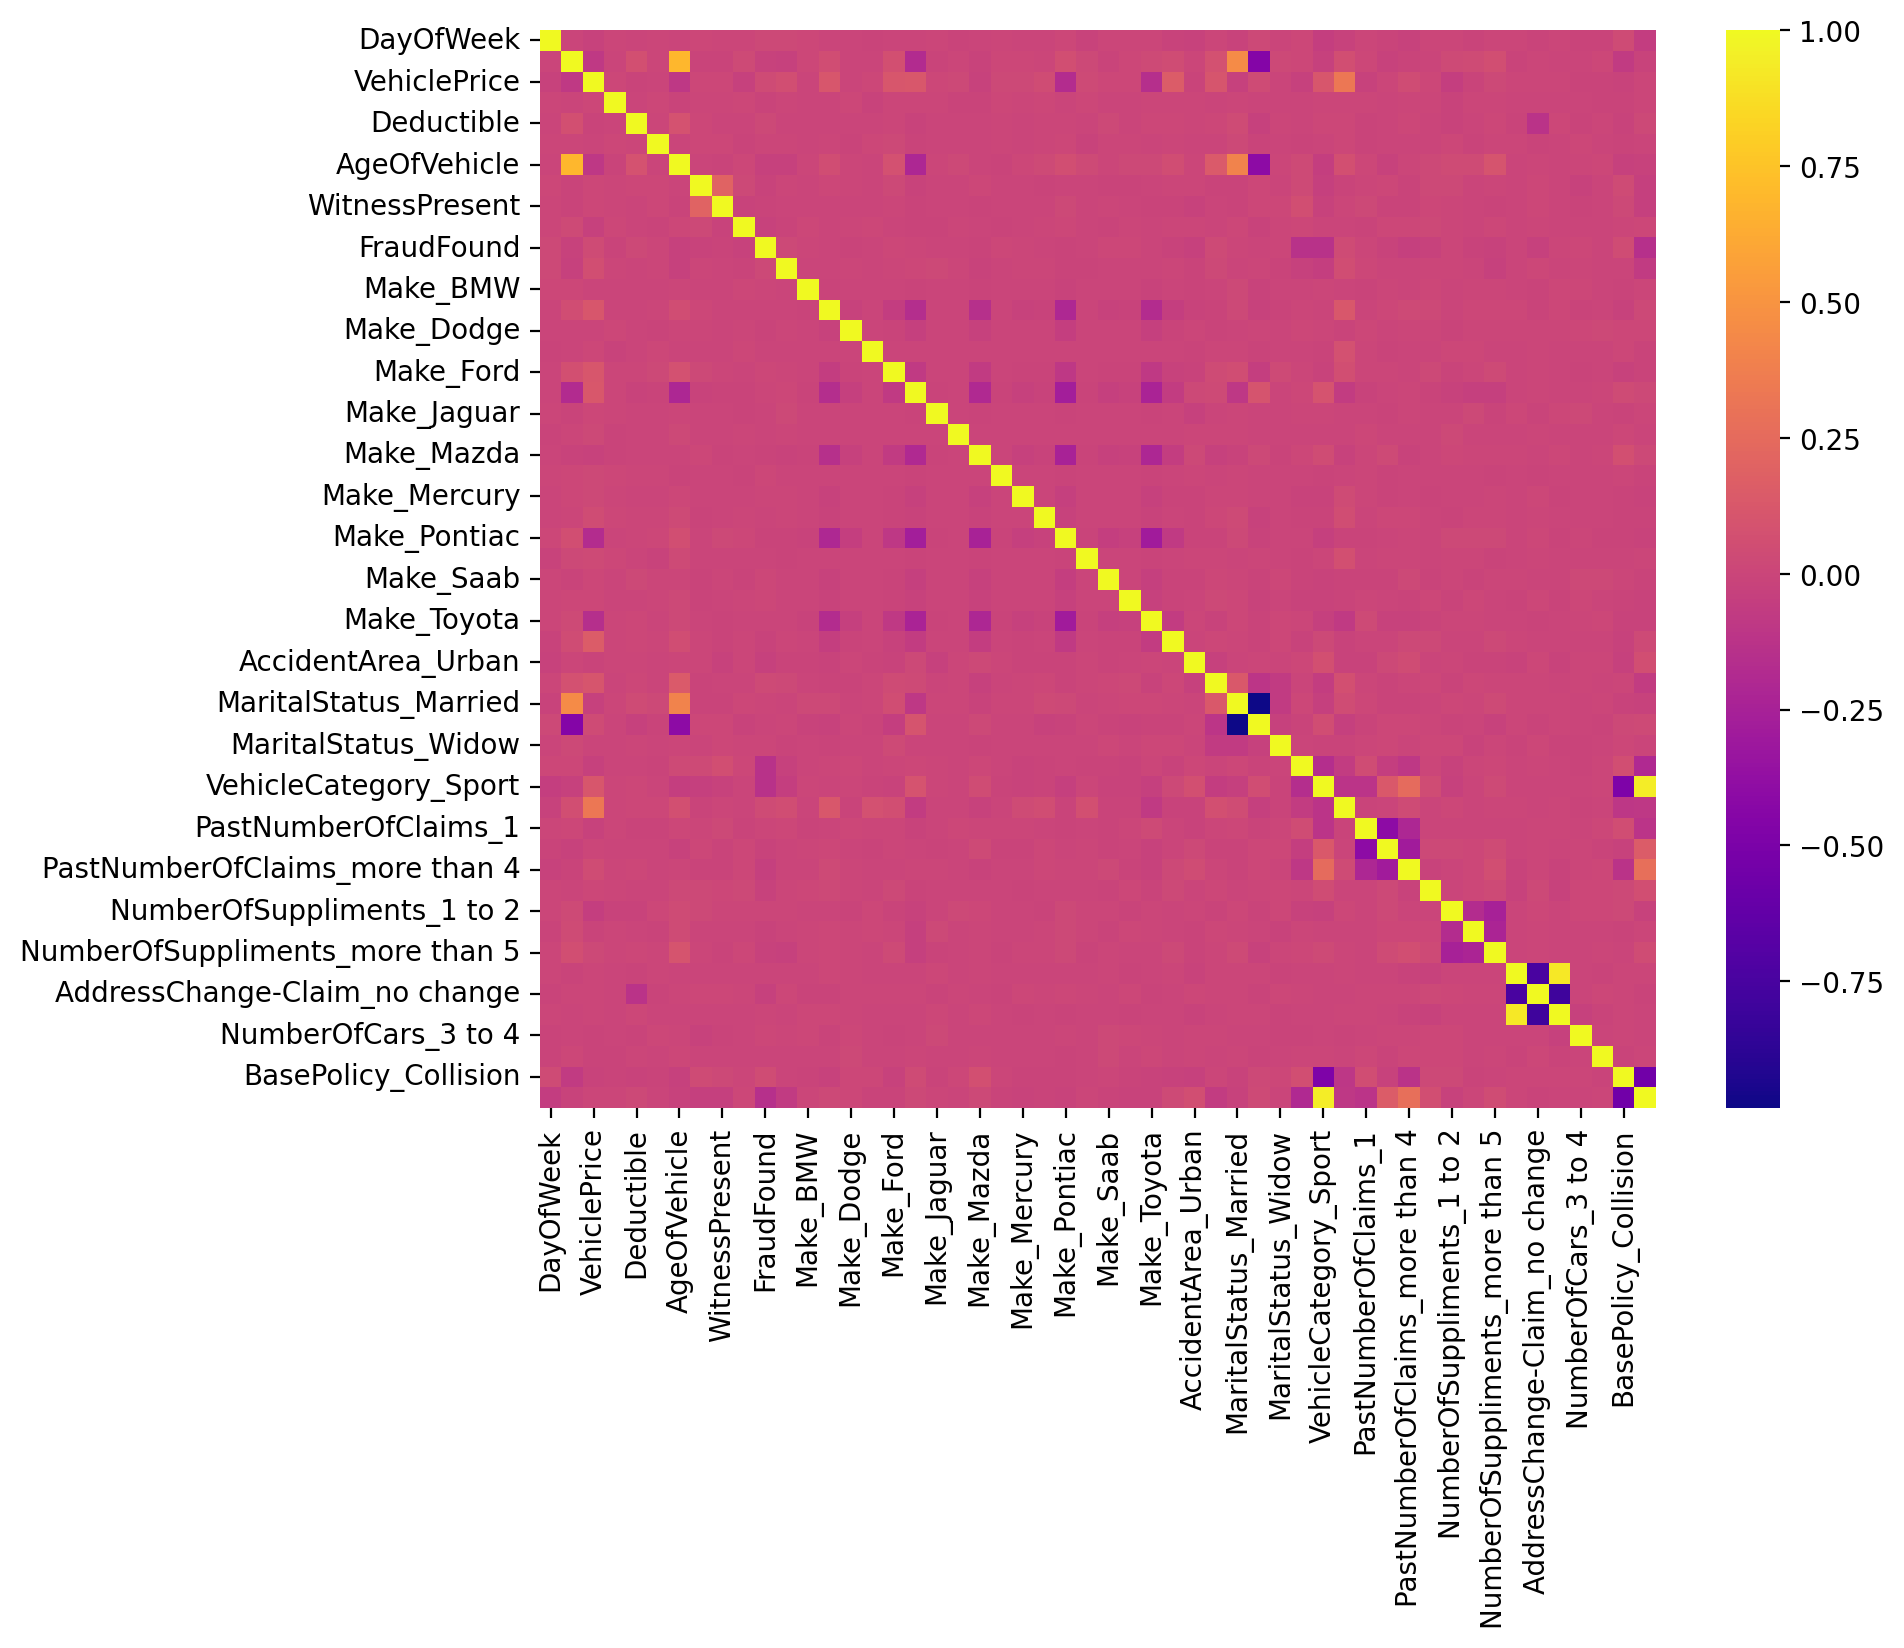

In [41]:
plt.figure(figsize = (9, 7), dpi = 200);
sns.heatmap(data = car_acc_corr.corr(), cmap = 'plasma');

In [42]:
X = pd.get_dummies(car_acc.drop(['FraudFound'], axis = 1), drop_first = True)
y = car_acc['FraudFound']

## Часть 3: Baseline Models

В связи с поставленной задачей, будем использовать метрики f1-score, precision и recall. 
Для визуализации можно использовать roc-auc curve.

Обучим модели логистической регрессии, случайного леса и градиентного бустинга на основе дерева решений и сравним качество их работы с помощью выбранных метрик.

In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

In [45]:
def fit_report(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot();

              precision    recall  f1-score   support

           0       0.95      0.63      0.75      2906
           1       0.06      0.42      0.11       178

    accuracy                           0.61      3084
   macro avg       0.51      0.52      0.43      3084
weighted avg       0.90      0.61      0.72      3084



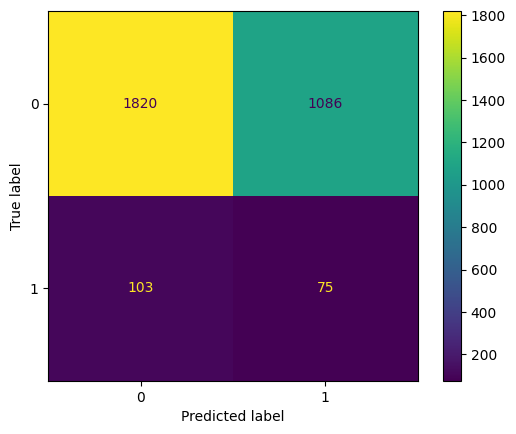

In [56]:
logreg_model = LogisticRegression(class_weight = 'balanced')
fit_report(logreg_model, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2906
           1       0.00      0.00      0.00       178

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.49      3084
weighted avg       0.89      0.94      0.91      3084



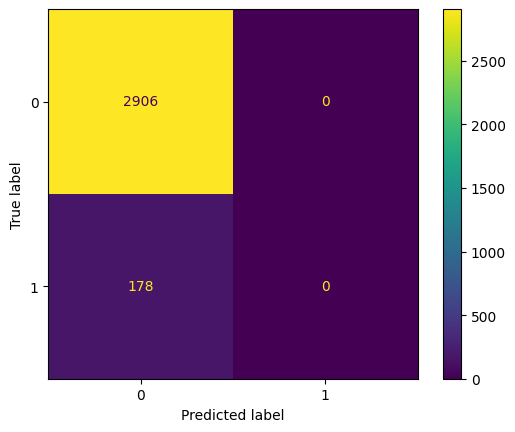

In [57]:
rf_model = RandomForestClassifier(class_weight = 'balanced')
fit_report(rf_model, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2906
           1       0.62      0.03      0.05       178

    accuracy                           0.94      3084
   macro avg       0.78      0.51      0.51      3084
weighted avg       0.93      0.94      0.92      3084



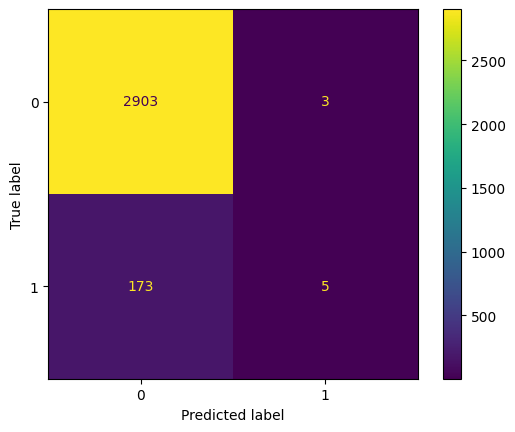

In [58]:
base = DecisionTreeClassifier(class_weight = 'balanced')
gb_model = GradientBoostingClassifier()
fit_report(gb_model, X_train, y_train, X_test, y_test)

## Часть 4: Избавление от проблемы дисбаланса

In [49]:
from imblearn.under_sampling import NearMiss

In [50]:
nm_resampler = NearMiss(sampling_strategy = 1)
X_train_rs, y_train_rs = nm_resampler.fit_resample(X_train, y_train)

              precision    recall  f1-score   support

           0       0.94      0.41      0.57      2906
           1       0.06      0.61      0.11       178

    accuracy                           0.42      3084
   macro avg       0.50      0.51      0.34      3084
weighted avg       0.89      0.42      0.54      3084



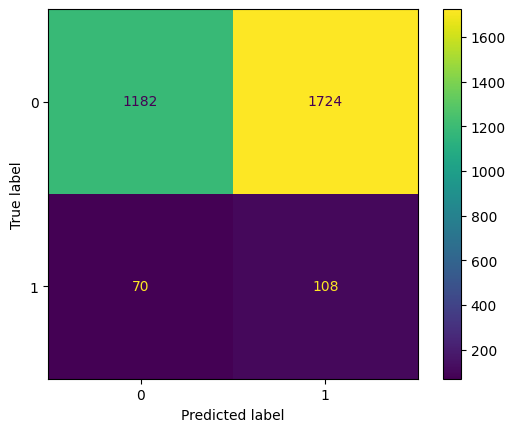

In [59]:
fit_report(logreg_model, X_train_rs, y_train_rs, X_test, y_test)

              precision    recall  f1-score   support

           0       0.98      0.47      0.63      2906
           1       0.09      0.81      0.15       178

    accuracy                           0.49      3084
   macro avg       0.53      0.64      0.39      3084
weighted avg       0.92      0.49      0.60      3084



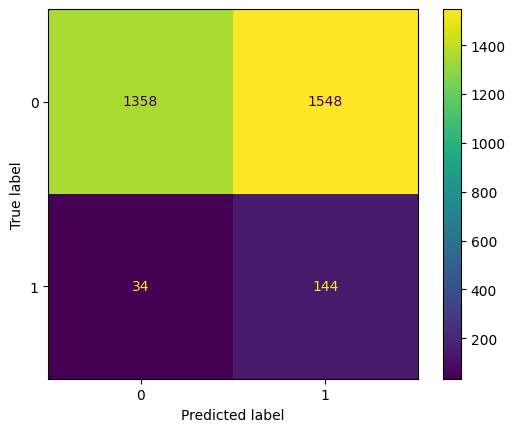

In [60]:
fit_report(rf_model, X_train_rs, y_train_rs, X_test, y_test)

              precision    recall  f1-score   support

           0       0.98      0.49      0.65      2906
           1       0.09      0.80      0.16       178

    accuracy                           0.51      3084
   macro avg       0.53      0.65      0.40      3084
weighted avg       0.92      0.51      0.62      3084



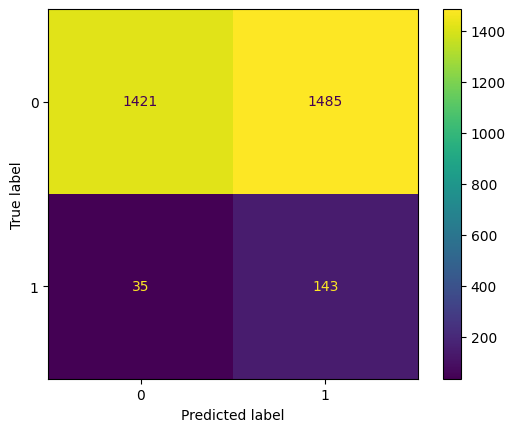

In [61]:
fit_report(gb_model, X_train_rs, y_train_rs, X_test, y_test)

## Часть 5: Кросс-валидация и подбор гиперпараметров моделей

In [62]:
params_logreg = {'penalty' : ['l1', 'l2', 'elasticnet', None], 'C' : np.logspace(0.01, 5, 20)}
params_rf = {'n_estimators' : [20, 50, 100, 125, 150], 'max_depth' : range(5, 12)}
params_gb = {'n_estimators' : [5, 10, 20, 50, 100], 'learning_rate' : np.logspace(0.1, 5.1, 20)}
logreg_model = LogisticRegression(solver = 'saga', class_weight = 'balanced')
logreg_cv = GridSearchCV(estimator = logreg_model, param_grid = params_logreg, cv = 5 )
rf_cv = GridSearchCV(estimator = rf_model, param_grid = params_rf, cv = 5)
gb_cv = GridSearchCV(estimator = gb_model, param_grid = params_gb, cv = 5)

In [63]:
warnings.filterwarnings('ignore')
logreg_cv.fit(X_train_rs, y_train_rs)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          solver='saga'),
             param_grid={'C': array([1.02329299e+00, 1.87340459e+00, 3.42975547e+00, 6.27906150e+00,
       1.14954590e+01, 2.10454344e+01, 3.85291540e+01, 7.05376607e+01,
       1.29137576e+02, 2.36419999e+02, 4.32828440e+02, 7.92405294e+02,
       1.45070446e+03, 2.65589271e+03, 4.86230397e+03, 8.90171497e+03,
       1.62969099e+04, 2.98357419e+04, 5.46221035e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2', 'elasticnet', None]})

In [64]:
rf_cv.fit(X_train_rs, y_train_rs)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': range(5, 12),
                         'n_estimators': [20, 50, 100, 125, 150]})

In [71]:
gb_cv.fit(X_train_rs, y_train_rs)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([1.25892541e+00, 2.30758600e+00, 4.22976062e+00, 7.75306963e+00,
       1.42112271e+01, 2.60489051e+01, 4.77471406e+01, 8.75195877e+01,
       1.60421716e+02, 2.94049911e+02, 5.38987815e+02, 9.87954269e+02,
       1.81090112e+03, 3.31934682e+03, 6.08429869e+03, 1.11524021e+04,
       2.04421380e+04, 3.74700446e+04, 6.86818691e+04, 1.25892541e+05]),
                         'n_estimators': [5, 10, 20, 50, 100]})

In [72]:
def predict_report(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot();

              precision    recall  f1-score   support

           0       0.94      0.60      0.74      2906
           1       0.06      0.41      0.10       178

    accuracy                           0.59      3084
   macro avg       0.50      0.51      0.42      3084
weighted avg       0.89      0.59      0.70      3084



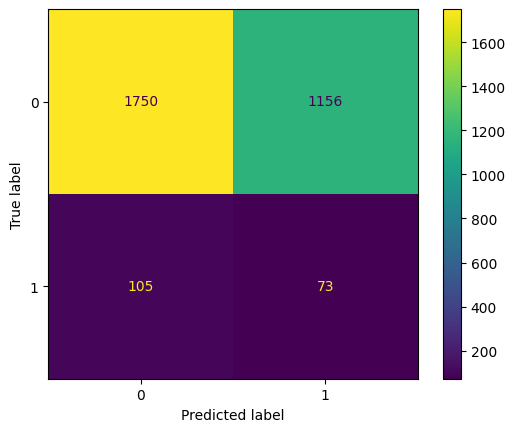

In [73]:
predict_report(logreg_cv, X_test, y_test)

              precision    recall  f1-score   support

           0       0.98      0.49      0.65      2906
           1       0.09      0.81      0.16       178

    accuracy                           0.50      3084
   macro avg       0.53      0.65      0.40      3084
weighted avg       0.93      0.50      0.62      3084



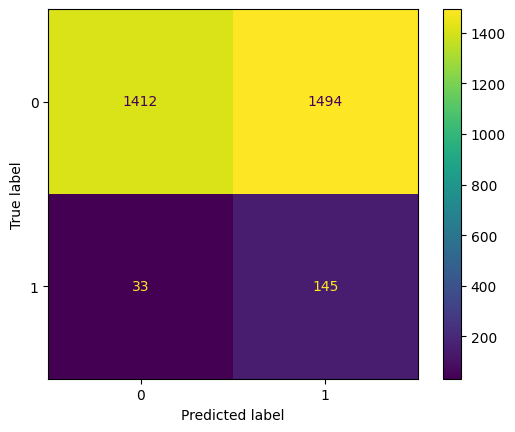

In [74]:
predict_report(rf_cv, X_test, y_test)

              precision    recall  f1-score   support

           0       0.98      0.49      0.65      2906
           1       0.09      0.82      0.16       178

    accuracy                           0.51      3084
   macro avg       0.53      0.65      0.41      3084
weighted avg       0.93      0.51      0.62      3084



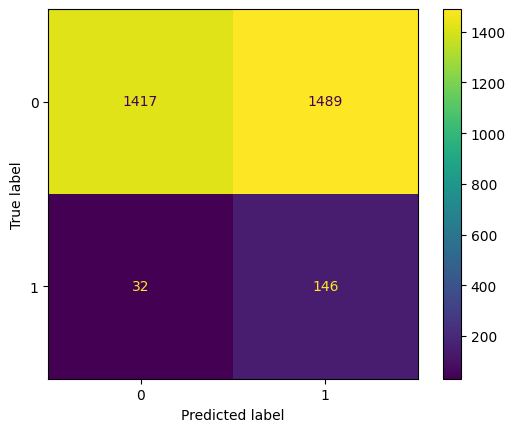

In [75]:
predict_report(gb_cv, X_test, y_test)

In [76]:
rf_cv.best_params_

{'max_depth': 11, 'n_estimators': 125}

In [77]:
logreg_cv.best_params_

{'C': 1.023292992280754, 'penalty': 'l1'}

In [78]:
gb_cv.best_params_

{'learning_rate': 1.2589254117941673, 'n_estimators': 10}

## Часть 6: Заключительный анализ работы моделей

In [79]:
feature_coeffs = pd.DataFrame({'features' : [i for i in (X.columns)], 
                               'coeffs' : np.round(logreg_cv.best_estimator_.coef_[0], 6)})
feature_coeffs = feature_coeffs.sort_values('coeffs')
feature_coeffs = feature_coeffs.set_index(['features'])

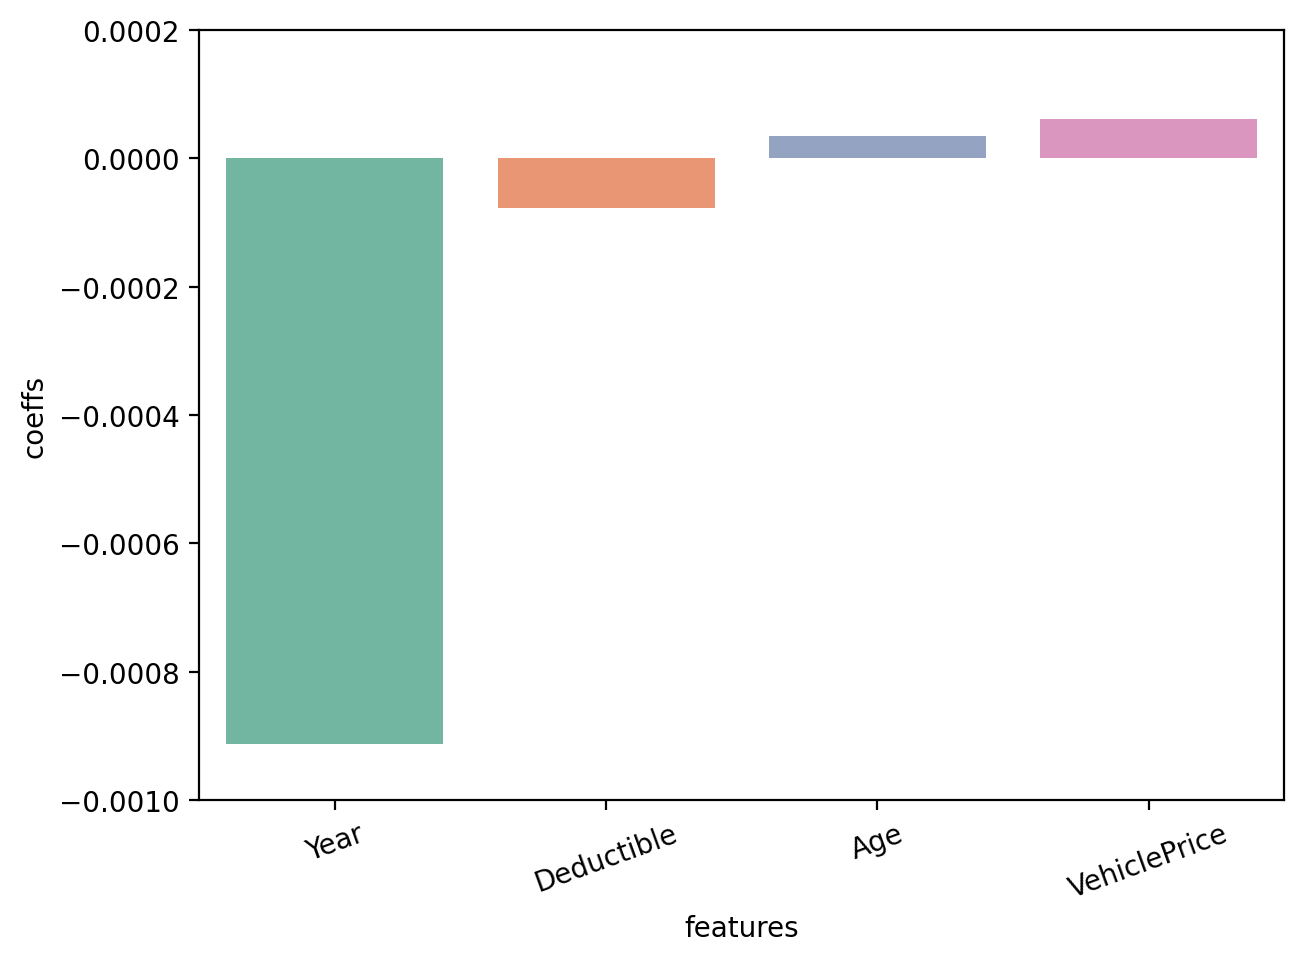

In [80]:
plt.figure(figsize = (7, 5), dpi = 200)
g = sns.barplot(data = feature_coeffs[abs(feature_coeffs['coeffs']) >= 0.00001], 
            x = feature_coeffs[abs(feature_coeffs['coeffs']) >= 0.00001].index, y = 'coeffs',
           palette = 'Set2');
g.set_ylim(-0.001, 0.0002);
plt.xticks(rotation = 20);
plt.yticks(minor = True);

In [81]:
feature_coeffs = pd.DataFrame({'features' : [i for i in (X.columns)], 
                               'importancy' : np.round(rf_cv.best_estimator_.feature_importances_, 5)})
feature_coeffs = feature_coeffs.sort_values('importancy')
feature_coeffs = feature_coeffs.set_index(['features'])

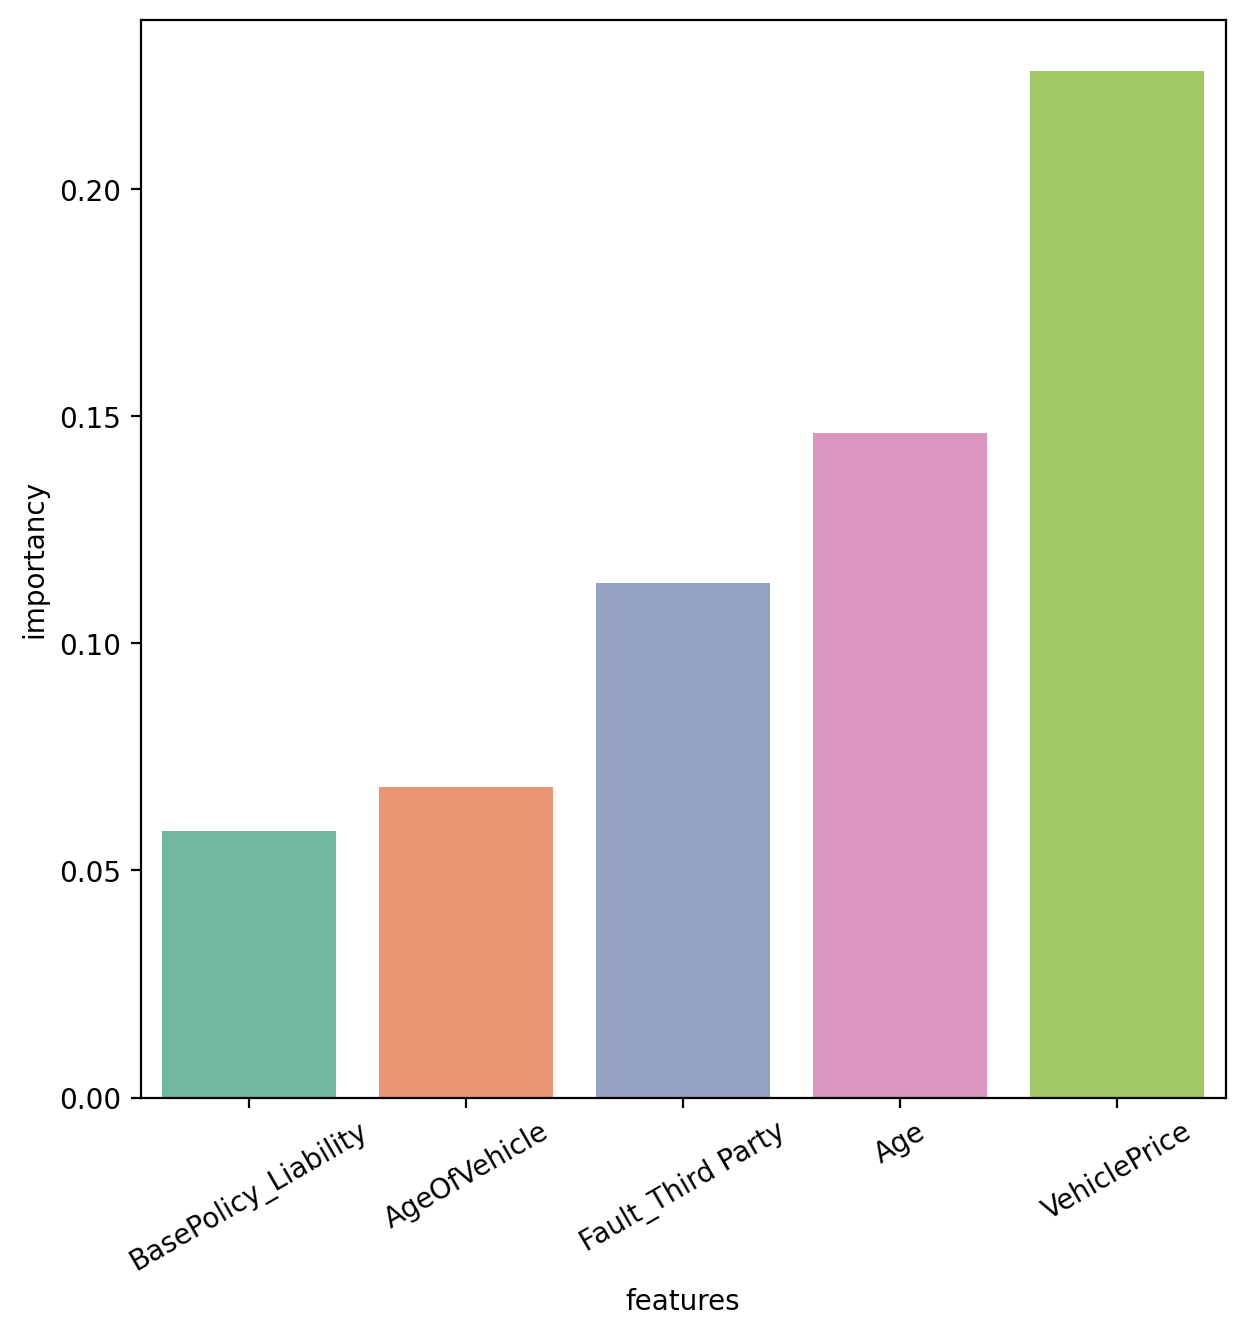

In [82]:
plt.figure(figsize = (7, 7), dpi = 200)
sns.barplot(data = feature_coeffs[abs(feature_coeffs['importancy']) >= 0.04], 
            x = feature_coeffs[abs(feature_coeffs['importancy']) >= 0.04].index, y = 'importancy',
           palette = 'Set2')
plt.xticks(rotation = 30);

In [83]:
feature_coeffs = pd.DataFrame({'features' : [i for i in (X.columns)], 
                               'importancy' : np.round(gb_cv.best_estimator_.feature_importances_, 5)})
feature_coeffs = feature_coeffs.sort_values('importancy')
feature_coeffs = feature_coeffs.set_index(['features'])

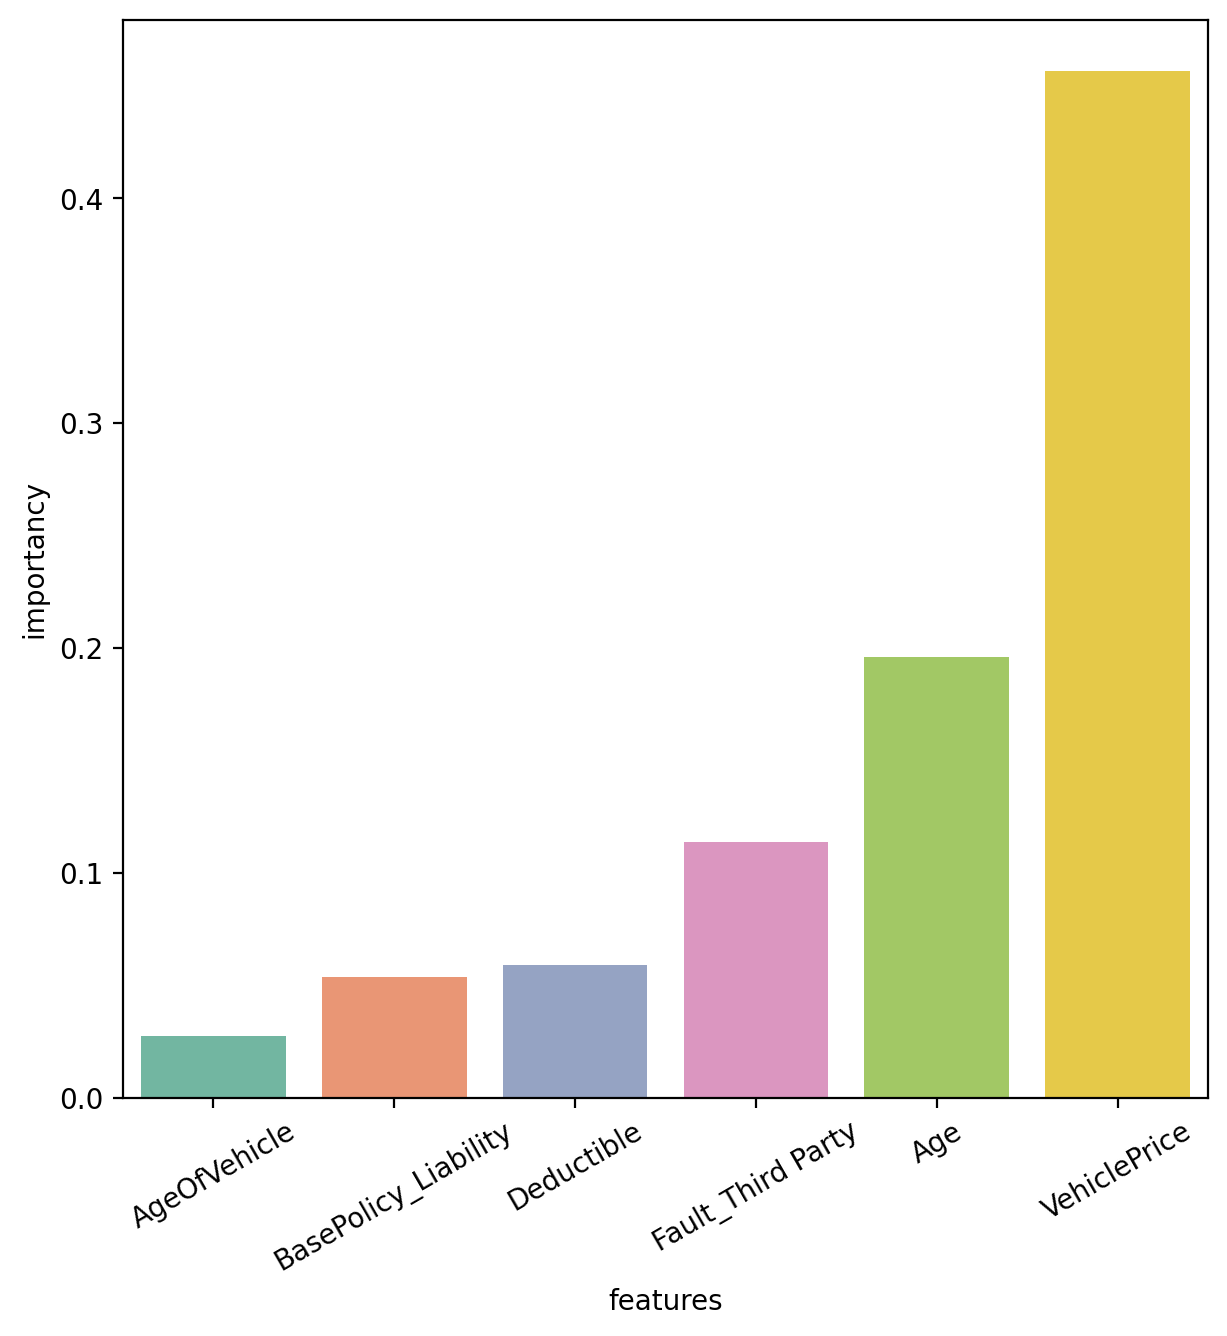

In [84]:
plt.figure(figsize = (7, 7), dpi = 200)
sns.barplot(data = feature_coeffs[abs(feature_coeffs['importancy']) >= 0.025], 
            x = feature_coeffs[abs(feature_coeffs['importancy']) >= 0.025].index, y = 'importancy',
           palette = 'Set2')
plt.xticks(rotation = 30);

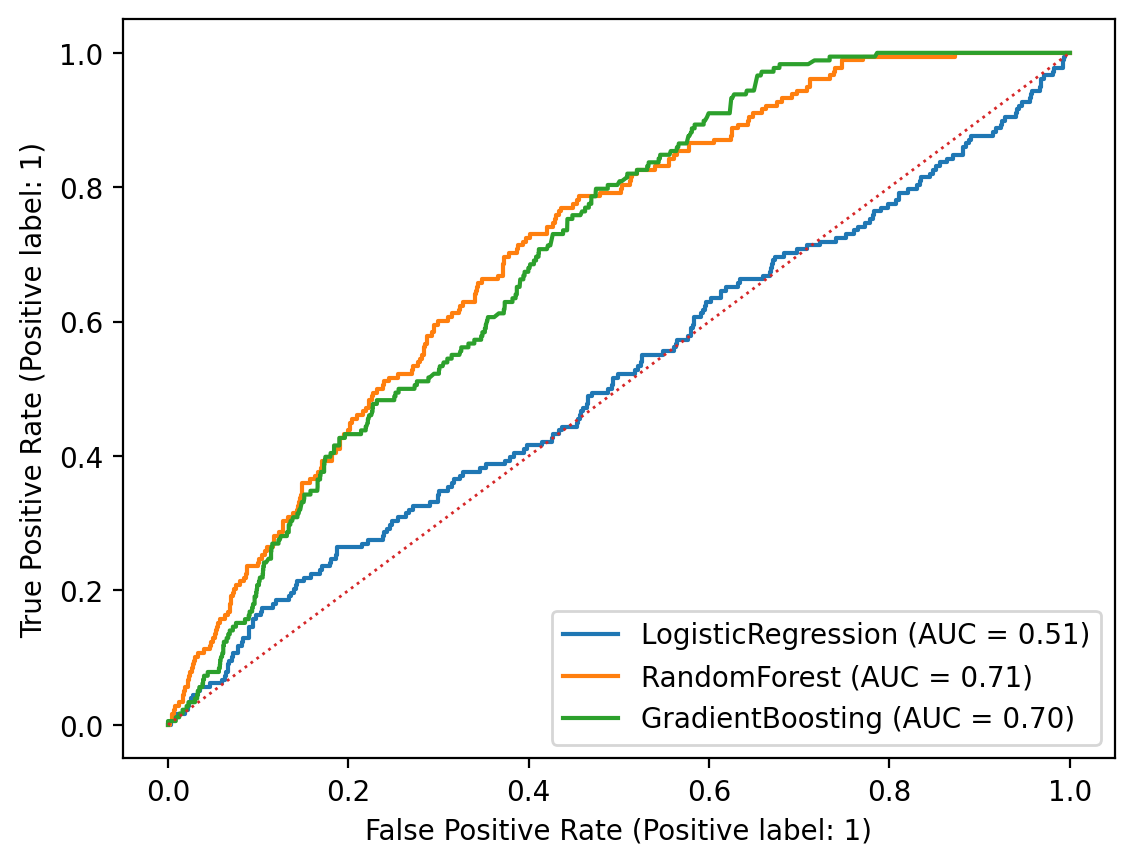

In [85]:
fig, axs = plt.subplots(dpi = 200);
y_pred_roc = logreg_cv.predict_proba(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_roc[:, 1], name = 'LogisticRegression', ax = axs)
y_pred_roc = rf_cv.predict_proba(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_roc[:, 1], name = 'RandomForest', ax = axs)
y_pred_roc = gb_cv.predict_proba(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_roc[:, 1], name = 'GradientBoosting', ax = axs)
axs.plot([0, 1], [0, 1], linewidth = 1, linestyle = ":");
plt.show();